In [135]:
import os
import numpy as np
import pandas as pd
import cv2
# import easyocr
import pytesseract
import imutils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras import optimizers

from sklearn.metrics import f1_score
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam



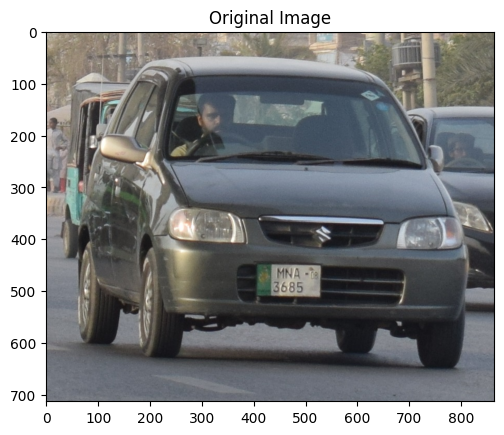

In [136]:
image = cv2.imread(r'D:\Users\Rameen-Laptop\Desktop\AI\Git\NumberPlateDataSet\Cars\DSC_0969.JPG')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

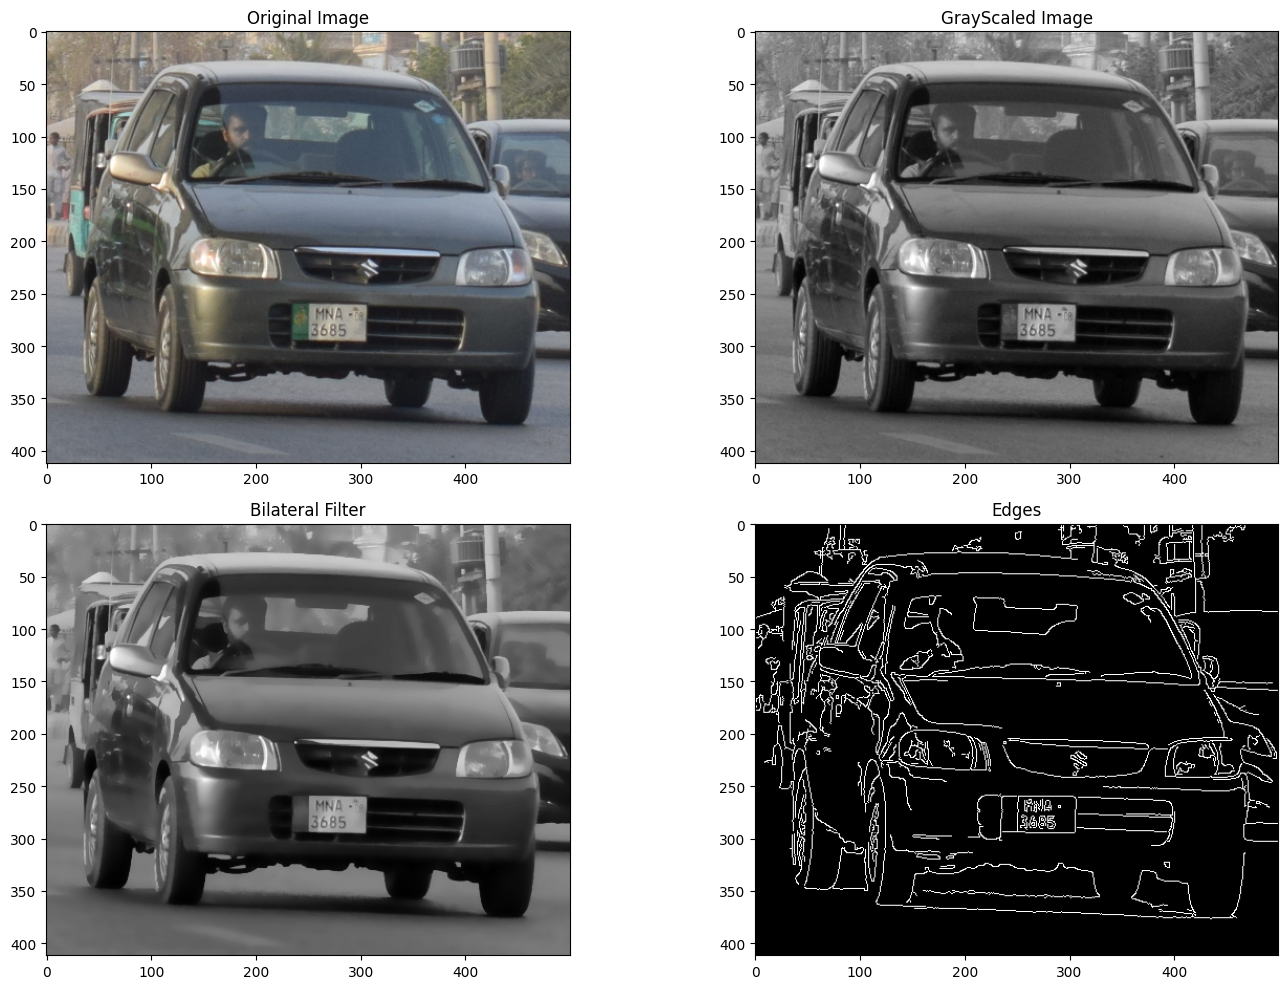

In [137]:
# image resized and graph sub plotted
image = imutils.resize(image,width=500)
fig,ax = plt.subplots(2,2,figsize=(15,10))

# display original image
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ax[0,0].imshow(img)
ax[0,0].set_title('Original Image')

# RGB to grayscale conversion
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ax[0,1].imshow(gray_img,cmap='gray')
ax[0,1].set_title('GrayScaled Image')

# # Applying GaussianBlur for additional smoothing
# gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
# ax[0,2].imshow(gray_img,cmap='gray')
# ax[0,2].set_title('Gaussian Blured Image')

# Applying Bilateral Filter for additional smoothing
gray_img = cv2.bilateralFilter(gray_img,11,17,17)
ax[1,0].imshow(gray_img,cmap='gray')
ax[1,0].set_title('Bilateral Filter')


edged = cv2.Canny(gray_img,30,200)
ax[1,1].imshow(edged, cmap='gray')
ax[1,1].set_title("Edges")


# Applying adaptive thresholding
# thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
# ax[1,2].imshow(thresh, cmap='gray')
# ax[1,2].set_title('Adaptive Thresholding')


fig.tight_layout()
plt.show()

In [138]:
# # Applying GaussianBlur for additional smoothing
# gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
# plt.imshow(gray_img,cmap='gray')
# plt.title('Gaussian Blured Image')
# plt.show()

# # Applying GaussianBlur for additional smoothing
# gray_img = cv2.bilateralFilter(gray_img,11,17,17)
# plt.imshow(gray_img,cmap='gray')
# plt.title('Bilateral Filter')
# plt.show()

# edged = cv2.Canny(gray_img,170,200)
# plt.imshow(edged, cmap='gray')
# plt.title("Edges")
# plt.show()

# # Applying adaptive thresholding
# thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
# plt.imshow(thresh, cmap='gray')
# plt.title('Adaptive Thresholding')
# plt.show()


# if NumberPlateCnt is not None:
#     # Drawing the slected contour on teh original iamge
#     cv2.drawContours(image, [NumberPlateCnt],-1,(0,255,0),2)
    # image: The original image on which you want to draw the contour.
    # contours: The list of contours, and in this case, it's a list containing a single contour NumberPlateCnt.
    # contourIdx: -1, which means to draw all the contours in the list.
    # color: (0, 255, 0), representing the color green in BGR format.
    # thickness: 2, specifying the thickness of the contour lines.

Number of contours: 10
[[[251 261]]

 [[303 260]]

 [[305 294]]

 [[251 294]]]


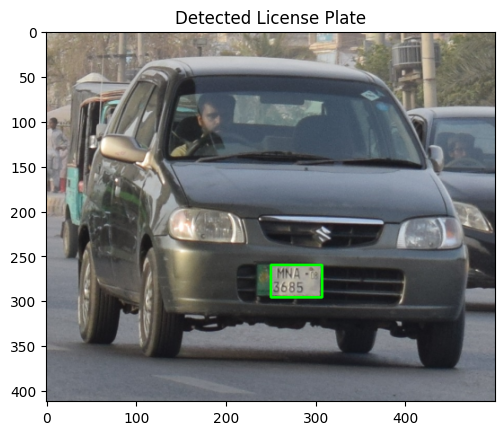

Extracted text: git



In [139]:
# # findding contours based on edges
# cnts = cv2.findContours(edged.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

# Finding contours in the thresholded image
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts,key= cv2.contourArea,reverse=True)[:10] #sort contours based on their are keeping minimum required area

print("Number of contours:", len(cnts))

NumberPlateDetectedImage = image.copy()
NumberPlateCnt = None #currently we have no number plate contour

ROI = 0
count = 0
for c in cnts:
    approx = cv2.approxPolyDP(c,10, True)
    if len(approx) == 4: #slect the contour with 4 corners
        NumberPlateCnt = approx #this is our approximate numebr plate contour
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        # Draw rectangle around the number plate
        cv2.rectangle(NumberPlateDetectedImage, (x, y), (x + w, y + h), (0, 255, 0), 2)
        break

print(NumberPlateCnt)




plt.imshow(cv2.cvtColor(NumberPlateDetectedImage,cv2.COLOR_BGR2RGB))
plt.title("Detected License Plate")
plt.show()

import pytesseract
text = pytesseract.image_to_string(ROI, config='--psm 8')
print("Extracted text:", text)

Extracted text: a



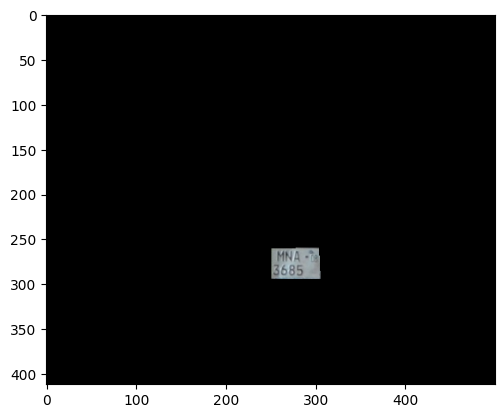

In [143]:
mask = np.zeros(gray_img.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

import pytesseract
text = pytesseract.image_to_string(new_image, config='--psm 8')
print("Extracted text:", text)

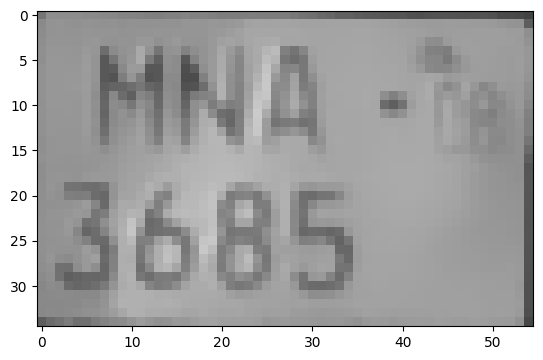

In [145]:
x,y = np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x)+1,np.max(y)+1)
cropped_image = gray_img[x1:x2,y1:y2]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [147]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[5, 3], [35, 3], [35, 19], [5, 19]], 'MNA', 0.7764095577941326),
 ([[1, 17], [39, 17], [39, 35], [1, 35]], '3685', 0.9993027567709852)]

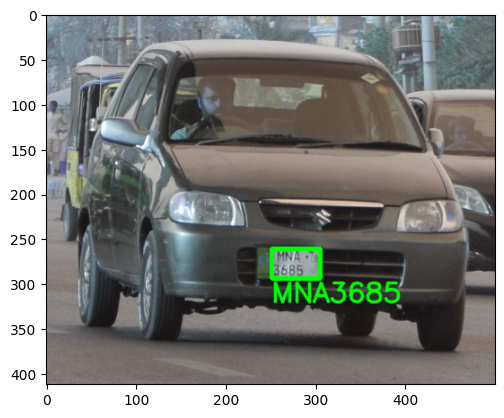

In [148]:
text = result[0][-2] + result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))